Cargando datos de viento desde 'dataset_meda_derived_data.parquet'...
Datos cargados. Se analizarán 11619268 mediciones de viento.
Datos listos para graficar.
Generando la rosa de los vientos y guardando en 'grafico_08_rosa_de_vientos.png'...


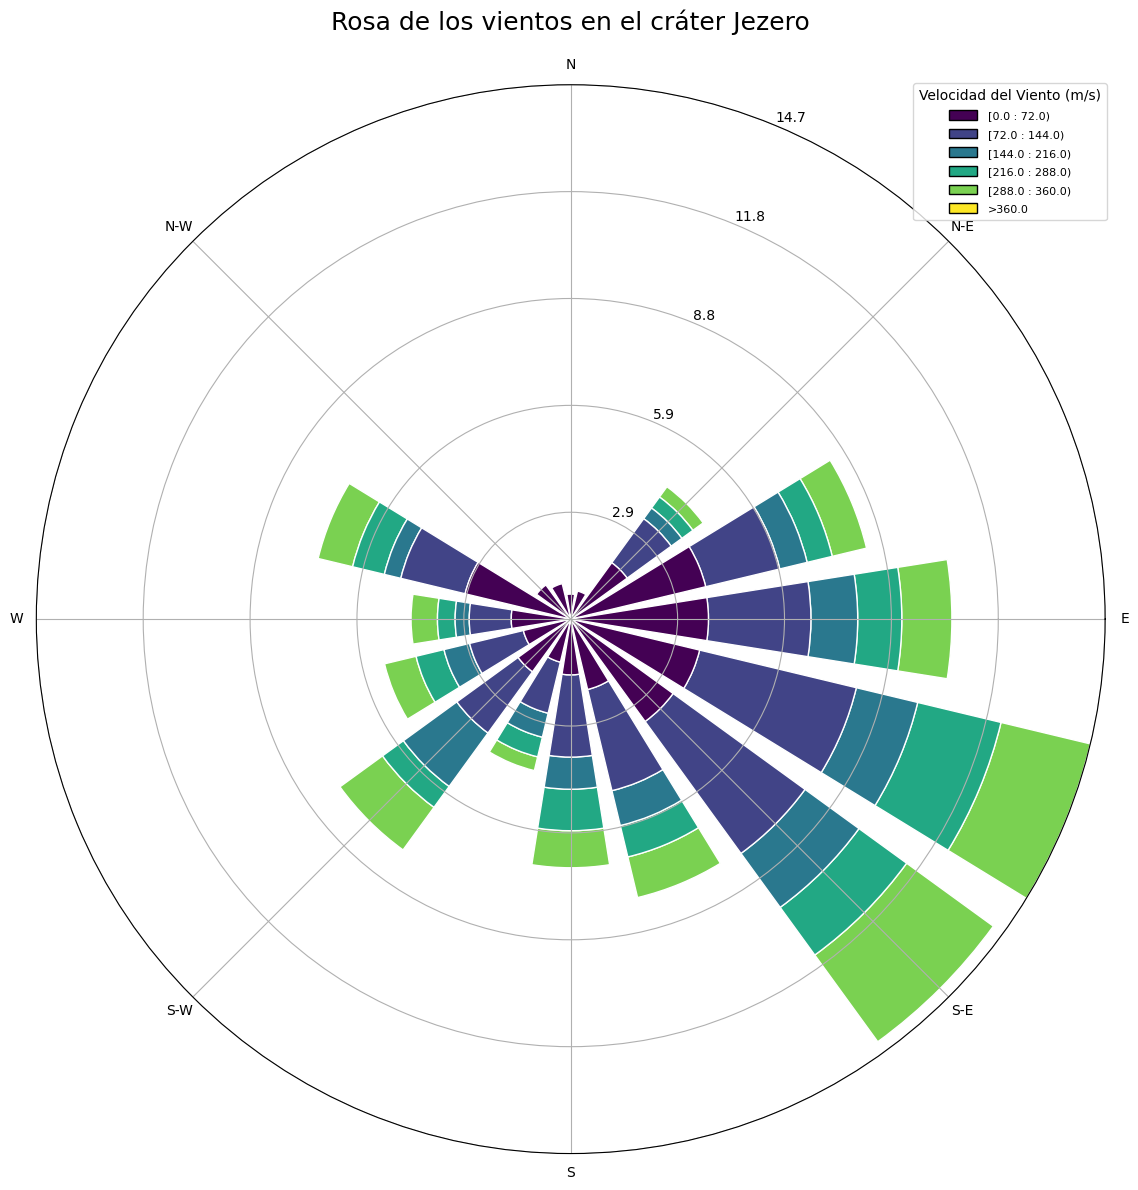

Proceso finalizado. El gráfico fue guardado en 'grafico_08_rosa_de_vientos.png'.


In [3]:
# -*- coding: utf-8 -*-
"""
Análisis de los datos de viento (WS) del instrumento MEDA.
Genera una rosa de los vientos para visualizar la distribución de la
dirección y la velocidad del viento de todo el dataset.
"""
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (12, 12) # Un gráfico cuadrado funciona mejor para la rosa de los vientos
RESOLUCION_DPI = 300
NOMBRE_ARCHIVO_SALIDA = "grafico_08_rosa_de_vientos.png"

# Parámetros del análisis
ARCHIVO_DERIVADO = 'dataset_meda_derived_data.parquet'

# --- 2. CARGA Y PREPARACIÓN DE DATOS ---
print(f"Cargando datos de viento desde '{ARCHIVO_DERIVADO}'...")
try:
    # Cargamos solo las columnas de viento para optimizar la memoria
    df_viento = pd.read_parquet(
        ARCHIVO_DERIVADO,
        columns=['HORIZONTAL_WIND_SPEED', 'WIND_DIRECTION']
    )
    # Eliminamos las filas donde no hay datos de viento
    df_viento.dropna(inplace=True)
    print(f"Datos cargados. Se analizarán {len(df_viento)} mediciones de viento.")
    print("Datos listos para graficar.")

# --- 3. CREACIÓN DEL GRÁFICO ---
    if not df_viento.empty:
        print(f"Generando la rosa de los vientos y guardando en '{NOMBRE_ARCHIVO_SALIDA}'...")
        
        # Creación de la figura con el tamaño estándar
        fig = plt.figure(figsize=TAMAÑO_FIGURA)
        # Añadimos un subplot con la proyección especial 'windrose'
        ax = fig.add_subplot(111, projection='windrose')

        # Creamos el gráfico de barras con la dirección y la velocidad
        ax.bar(
            df_viento['WIND_DIRECTION'],
            df_viento['HORIZONTAL_WIND_SPEED'],
            normed=True, # Muestra las frecuencias en porcentaje
            opening=0.8,
            edgecolor='white'
        )

        # Estilo y Títulos
        ax.set_title('Rosa de los vientos en el cráter Jezero', fontsize=18, pad=20)
        ax.set_legend(title='Velocidad del Viento (m/s)', loc='best')
        
# --- 4. GUARDADO Y VISUALIZACIÓN ---
        # A diferencia de otros gráficos, la visualización y el guardado en windrose
        # se manejan de forma ligeramente diferente. El tight_layout se aplica al final.
        plt.tight_layout()
        plt.savefig(NOMBRE_ARCHIVO_SALIDA, dpi=RESOLUCION_DPI, bbox_inches='tight')
        plt.show()

        print(f"Proceso finalizado. El gráfico fue guardado en '{NOMBRE_ARCHIVO_SALIDA}'.")
    else:
        print("No se encontraron datos de viento para graficar.")

except Exception as e:
    print(f"Ocurrió un error: {e}")

Vientos en Jezero y habitabilidad humana
Qué muestra realmente el gráfico

La figura es una rosa de los vientos: cada “pétalo” indica desde qué dirección sopla el viento.

Los colores NO son velocidades. Representan rangos de dirección angular en grados (0–360°; p. ej., 288–360° ≈ Noroeste–Norte).

La escala radial (2.9, 5.9, 8.8, 11.8, 14.7) expresa frecuencia relativa (%) con que el viento proviene de esa dirección.

Conclusión: no hay vientos de 288–360 m/s; ese número refiere a grados, no a m/s. En Jezero, las velocidades típicas medidas por MEDA están mayormente por debajo de ~20 m/s con ráfagas ocasionales mayores, pero nunca cientos de m/s.

Patrón direccional observado

Predominio de vientos desde el Este–Sureste (E–SE), con aportes secundarios desde Oeste–Suroeste (W–SW).

Pocas “calmas”: el viento sopla con cierta persistencia a lo largo del periodo representado.

Implicancias para la habitabilidad

Polvo como principal riesgo operativo

Aunque la fuerza mecánica del viento en Marte es baja (atmósfera muy tenue), el transporte y deposición de polvo sí es crítico.

Con vientos dominantes E–SE, es esperable mayor acumulación de polvo en estructuras a sotavento y en líneas de flujo asociadas a ese cuadrante.

Recomendación: orientar entradas de hábitat, filtros y trampas de polvo considerando esa dirección dominante; prever barreras, faldones y superficies antiadherentes.

Energía y mantenimiento

La energía eólica es poco eficiente por la baja densidad del aire: los generadores requerirían rotores enormes para potencias modestas.

Los paneles solares deben incorporar estrategias activas de limpieza (vibración, soplado, recubrimientos) y respaldo (baterías sobredimensionadas y/o fuente nuclear) por el ensuciamiento recurrente.

Planificación de EVA (actividades extravehiculares)

Ajustar ventanas operativas según la climatología local: con polvo transportado, baja visibilidad y abrasión de superficies.

Los trajes y uniones móviles deben estar protegidos contra intrusión de partículas; estaciones de despolvado a la entrada del hábitat son indispensables.

Diseño del emplazamiento

Ubicar tomás de aire, radiadores, ópticas y sensores en zonas menos expuestas al “spray” de polvo dominante.

Modelar microtopografía local (taludes, obstáculos) para romper líneas de flujo y reducir remoción/depósito cerca del hábitat.

Cierre

El gráfico confirma un régimen direccional persistente (E–SE) y una presencia frecuente de viento. En Marte, el viento rara vez “empuja fuerte”, pero ensucia siempre: la gestión del polvo, más que la carga estructural, es el factor decisivo para la habitabilidad operativa (energía, mantenimiento y salud ambiental del hábitat).